In [1]:
# Import necessary libraries
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [2]:
# Load the IMDB dataset, keeping only the top 10,000 most frequently occurring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
# Function to vectorize sequences (one-hot encoding)

def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1.
 return results

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Building the Neural Network

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

C:\Users\hrish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['accuracy'])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [9]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])

In [11]:
history = model.fit(x_train, y_train, epochs=20, batch_size=50, validation_data=(x_val, y_val))

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - acc: 0.7655 - loss: 0.4749 - val_acc: 0.9354 - val_loss: 0.1877
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9192 - loss: 0.2115 - val_acc: 0.9529 - val_loss: 0.1471
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9406 - loss: 0.1645 - val_acc: 0.9604 - val_loss: 0.1236
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9527 - loss: 0.1379 - val_acc: 0.9648 - val_loss: 0.1108
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9583 - loss: 0.1229 - val_acc: 0.9721 - val_loss: 0.0898
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9686 - loss: 0.0960 - val_acc: 0.9786 - val_loss: 0.0735
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9750 - loss: 0.0791 - val_acc: 0.9826 - val_loss: 0.0600
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9802 - loss: 0.0635 - val_acc: 0.9869 - val_loss: 0.0476
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - a

In [12]:
# Extract training and validation loss values from the history dictionary

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

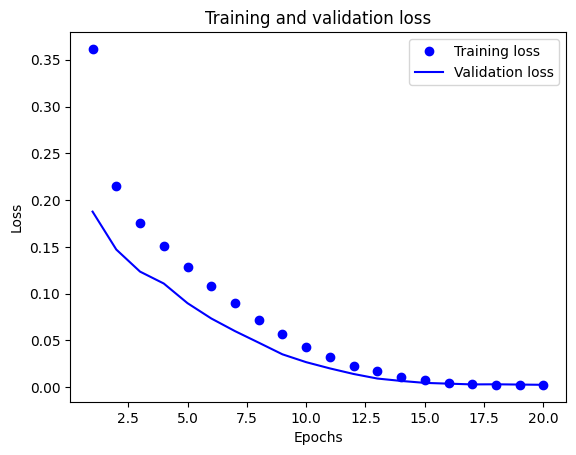

In [13]:
# Plot training and validation loss over epochs
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
plt.clf()

<Figure size 640x480 with 0 Axes>

In [15]:
# Extract training and validation accuracy values from the history dictionary
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

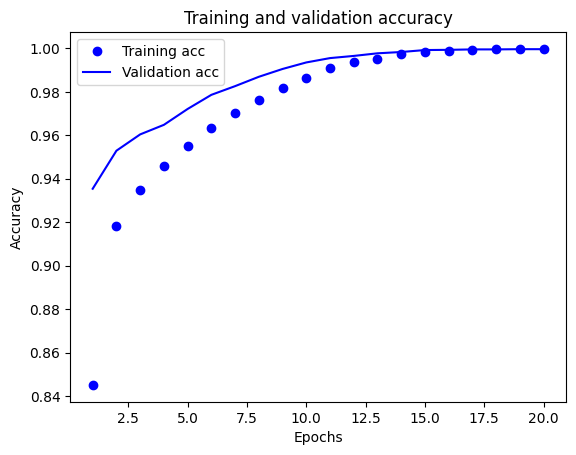

In [16]:
# Plot training and validation accuracy over epochs
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
print(history.history.keys())

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


## Evaluate the model

In [18]:
print(np.mean(history.history["val_acc"]))

0.9851199954748153


In [19]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8470 - loss: 1.7878
Test Loss: 1.7410374879837036
Test Accuracy: 0.8510400056838989


In [20]:
print("Performed by: Vinit Gurav || Roll No: 52")

Performed by: Vinit Gurav || Roll No: 52
